In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
x = np.linspace(0, 5, 10, endpoint=False)
y = multivariate_normal.pdf(x, mean=2.5, cov=0.01); 
y

array([7.65392974e-136, 5.52094836e-087, 5.53070955e-049, 7.69459863e-022,
       1.48671951e-005, 3.98942280e+000, 1.48671951e-005, 7.69459863e-022,
       5.53070955e-049, 5.52094836e-087])

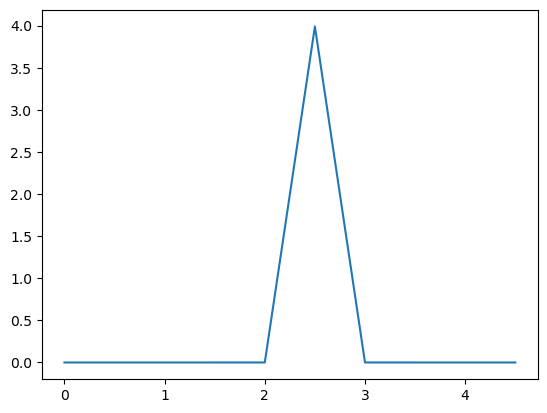

In [3]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(x, y)
plt.show()

In [4]:
rv = multivariate_normal(mean=None, cov=.1, allow_singular=False)

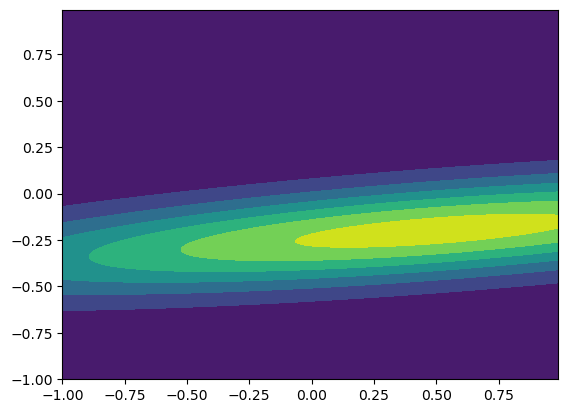

In [5]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.2, 0.05]])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))

In [6]:
import numpy as np
from sklearn.decomposition import PCA


In [7]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)


PCA(n_components=2)

In [8]:

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]


In [9]:
pca = PCA(n_components=2, svd_solver='full')

In [10]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import tensorflow as tf
import seaborn as sns
sns.set()

In [11]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

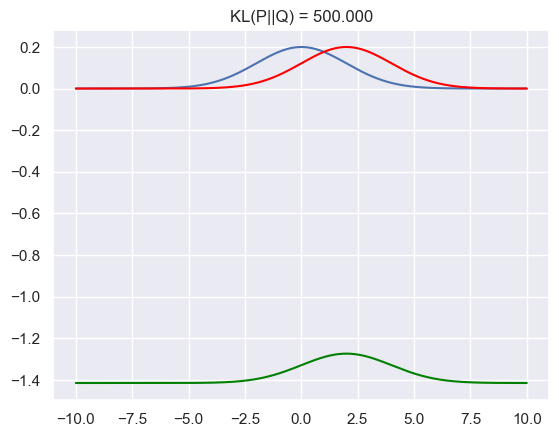

In [20]:
x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 2)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')
plt.plot(x, (q-2)/(np.sqrt(2)), c='green' )

In [13]:
kl_divergence(p, q)

499.9997170653493

In [14]:
def kld_gauss(u1, s1, u2, s2):
  # general KL two Gaussians
  # u2, s2 often N(0,1)
  # https://stats.stackexchange.com/questions/7440/ +
  # kl-divergence-between-two-univariate-gaussians
  # log(s2/s1) + [( s1^2 + (u1-u2)^2 ) / 2*s2^2] - 0.5
  v1 = s1 * s1
  v2 = s2 * s2
  a = np.log(s2/s1) 
  num = v1 + (u1 - u2)**2
  den = 2 * v2
  b = num / den
  return a + b - 0.5

In [15]:
kld_gauss(0,2,2,2)

0.5

In [16]:
arr = np.array([[2.0, 0.3, 1.], [0.1, 2., 1], [1., 2., 2.]])
arr

array([[2. , 0.3, 1. ],
       [0.1, 2. , 1. ],
       [1. , 2. , 2. ]])

In [17]:
rv = multivariate_normal([0.5, -0.2, 1], arr)

ValueError: the input matrix must be positive semidefinite

In [ ]:
i_lower = np.tril_indices(3, -1)
arr[i_lower] = arr.T[i_lower]  # make the matrix symmetric
arr

In [ ]:
a = np.zeros((3, 3), int);
np.fill_diagonal(a, [1,2,3]) 

In [ ]:
a

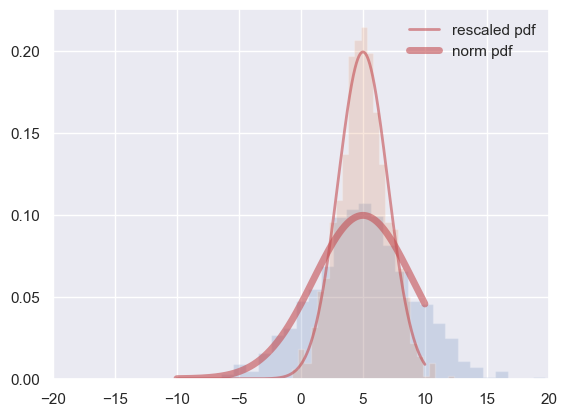

In [34]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

actual_mean = 5
actual_std = 2

ax.plot(x, norm.pdf(x, actual_mean, actual_std),
       'r-', lw=2, alpha=0.6, label='rescaled pdf')
ax.plot(x, norm.pdf(x, actual_mean, 4),
       'r-', lw=5, alpha=0.6, label='norm pdf')
r = norm.rvs(actual_mean, 4, size=1000)
rescale = (r - actual_mean) / actual_std + actual_mean

ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.hist(rescale, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim(-20, 20)
ax.legend(loc='best', frameon=False)
plt.show()